# Volume estimates
Watanabe and Yoshida introduced in [WY05] a technique to find lower bounds for the Hilbert–Kunz multiplicity of rings as a function of certain constants of the ring. This fascinating technique was sucessful to prove the conjecture in several low dimensional cases. Watanabe and Yoshida did it in dimensions 3 and 4, and Aberbach and Enescu [AE12] pushed it further to solve dimension 5 and 6. Recently, in 2024, Aberbach and Cox-Steib refined a new technique that was able to provide bounds sharp enough to crack dimension 7, and they claim that it has been possible to apply the technique further to higher dimensional cases in high multiplicity cases.

In this Jupyter Notebook, there are certain volume estimates to play with and check. Also, there is a cell showing how Aberbach and Enescu's improved lower estimate cannot be used in dimension 7.

These volume estimates use the following function:

**Definition.** For $d>0$ and $s\geq 0$, $$v_s = \operatorname{vol}\left\lbrace (x_1,\dots,x_d)\in [0,1]^d:\sum_{i=1}^d x_i\leq s\right\rbrace.$$

**Theorem.** According to Aberbach and Enescu (Section 3 of [AE12]),
$$
v_s = \sum_{n=0}^{\lfloor s\rfloor} (-1)^n \frac{(s-n)^d}{n!(d-n)!}
$$

This volume is used to provide lower bounds of the Hilbert–Kunz multiplicity.

In [3]:
def v(d,s):
    return sum((-1)^n*(s-n)^d/(factorial(n)*factorial(d-n)) for n in range(floor(s)+1))
def eHKA1(p,d):
    '''
    Hilbert–Kunz multiplicity of low dimensional quadric hypersurfaces via Yoshida's and Aberbach–Cox-Steib's formulas.
    This is used to draw the blue lines which are the thresholds we need to check with volume estimates.
    '''
    if d>7:
        raise ValueError('This function does not work in dimension 8 or larger.')
    if not p.is_prime():
        raise ValueError('The second argument, the characteristic, has to be a prime number.')
    if p==2:
        if d%2==0: # Even dimension
            m = d/2
            return (2^m+1)/2^m
        else: # Odd dimension
            m = (d+1)/2
            return 2^m/(2^m-1)
    else:
        l = [2,2,3/2,4/3,(29*p^2+15)/(24*p^2+12),(17*p^2+12)/(15*p^2+10),(781*p^4+656*p^2+315)/(720*p^4+570*p^2+270),(332*p^4 + 304*p^2 + 192)/(315*p^4 + 273*p^2 + 168)]
        return l[d]

## Dimension 4: Watanabe and Yoshida's volume estimate (2005)
Watanabe and Yoshida prove the following theorem:

**Theorem.** Let $(A,\mathfrak{m},k)$ be an unmixed local ring of characteristic
$p > 0$. Put $d= \dim A ≥ 1$. Let $J$ be a minimal reduction of $\mathfrak{m}$, and let $r$
be an integer with $r ≥ µ_A(\mathfrak{m}/J^∗)$, where $J^∗$ denotes the tight closure of $J$.
Also, let $s ≥ 1$ be a rational number. Then we have
$$
e_\text{HK}(A) \geq e(A)\left(v_s -r\cdot \frac{(s-1)^d}{d!}\right)=:f_e(s).
$$

In dimensions 4 and 5, this lower bound is good enough to show the Watanabe–Yoshida conjecture. The following cell illustrates the volume estimates $f_e(s)$ in dimension 4 for several values of $e$ 

verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 15 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(2.4)'
verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 14 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(2.4)'
verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 15 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(2.4)'
verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 15 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(2.4)'
verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 15 points.
verbose 0 (3899: plot.py, generate_plot_points) La

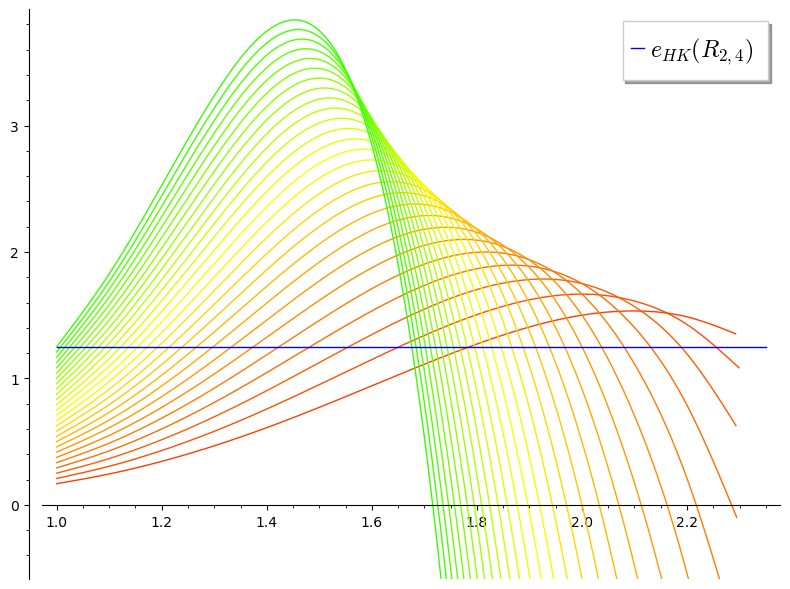

In [18]:
d = 4 # dimension
e = 4 # multiplicity
lb = eHKA1(2,d) # the lower bound that the volume estimates need to surpass
a = 10 # number of points (precision)
r = e-1 # parameter
s = 2.1
rg0,rg1 = 1,2.4
#e*(v(d,s)-r*(s-1)^d/factorial(d)),float(7/3)
p = sum(plot(spline([(s/a,e0*(v(d,s/a)-(e0-1)*(s/a-1)^d/factorial(d))) for s in range(floor(a*rg0),ceil(a*rg1))]),(rg0,rg1),rgbcolor=hue(0.01*e0),ymin=-0.5) for e0 in range(4,31))+line([(rg0,lb),(2.35,lb)],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d)#,title="Volume estimates in dimension %d, $4\leq e(R)\leq 137$"%d)
set_verbose(-1)
show(p,legend_font_size='xx-large',figsize=8)

In [209]:
# x   = SR.var('x')
# x0  = 0
# threshold = line([(rg0,4/3),(rg1,4/3)])
# set_verbose(-1)
# @interact
# def _(e0=slider([4 .. 30])):
#   ft = spline([(s/a,e0*(v(d,s/a)-(e0-1)*(s/a-1)^d/factorial(d))) for s in range(floor(a*rg0),ceil(a*rg1))])
#   pt = plot(ft, -1, 5, color=colors[e0%8], thickness=2)
#   #pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
#   #pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
#   show(threshold+pt, ymin=-.5, ymax=2.5)

## Aberbach and Enescu's volume estimates (2012)

**Theorem.** ...

The following cell shows how in dimension 6, the Hilbert–Kunz multiplicity of the $A_1$ and $A_2$ singularities in characteristic 2 are well below Aberbach and Enescu's volume estimates. However, the bounds they give are not so sharp, and they fall short for the value in characteristic 2.

The function max_G(e) is a function that to each $e$ and dimension $d$ associates the best volume estimate (up to a certain precision granted by the parameter $a$).

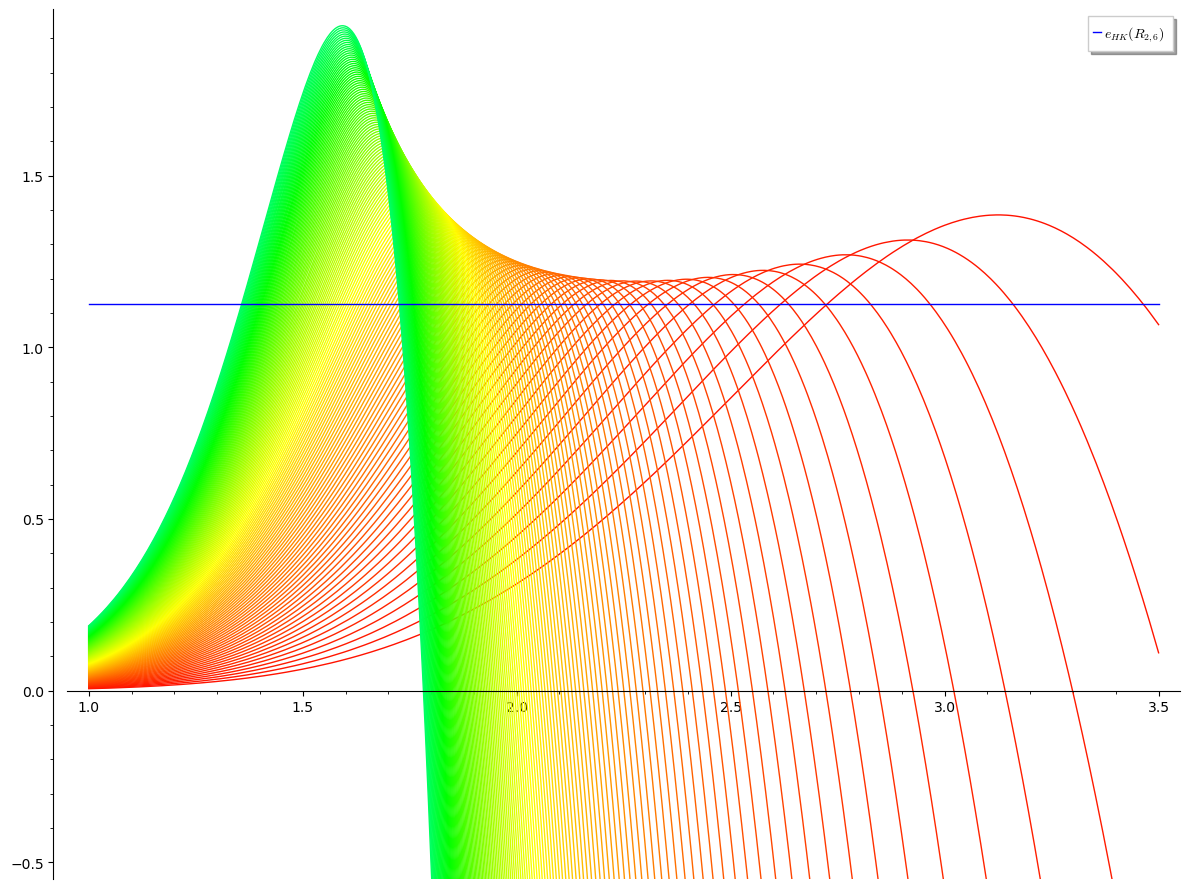

In [196]:
def max_G(e,d): # See definition in Aberbach and Enescu's 2012 paper.
    '''
    This function takes the G(e) values and computes an approximate maximum.
    a is simply a subdivision of the interval of values. Increase to get
    ever more precise values.
    '''
    a = 15
    l = [e*(v(d,s/a)-(e-2)*v(d,s/a-1)) for s in range(0,a*6)]
    m = max(l)
    return (e,m)
def G(e,d): # See definition in Aberbach and Enescu's 2012 paper.
    '''
    This function takes the G(e) values and computes an approximate maximum.
    a is simply a subdivision of the interval of values. Increase to get
    ever more precise values.
    '''
    a = 15
    l = [(s/a,e*(v(d,s/a)-(e-2)*v(d,s/a-1))) for s in range(0,a*6)]
    return spline(l)
d = 6
lb = lower_bound(d)
rg0,rg1 = 1,3.5
#show(points([max_G(e,d) for e in range(5,30)],color='red')+line([(0,lb),(30,lb)],color='green')+line([(0,17/15),(30,17/15)],color='blue'))
show(sum(plot(G(e0,d),(rg0,rg1),rgbcolor=hue(0.4/137*e0),ymin=-0.5) for e0 in range(4,137))+line([(rg0,lb),(rg1,lb)],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d),figsize=12)#,title="Volume estimates in dimension %d, $4\leq e(R)\leq 137$"%d)

In [ ]:
d = 6
rg0,rg1 = 1,3.5
#points([max_G(e,d) for e in range(5,30)],color='red')+line([(0,1.125),(30,1.125)],color='green')+line([(0,17/15),(30,17/15)],color='blue')
sum(plot(G(e0,d),(rg0,rg1),rgbcolor=hue(0.4/137*e0),ymin=-0.5) for e0 in range(4,137))+line([(rg0,5/4),(rg1,5/4)],color='blue',legend_label='$e_{HK}(R_{2,5})$')

The cell below is the plot of the volume estime given by Aberbach–Enescu, 2012, as a function on $s$ for the case of dimension 7 and multiplicity 6, and the line representing the value of the Hilbert–Kunz multiplicity of the quadric of dimension 7 and characteristic 2. It is not enough for us: as you can see, for every $s$, the volume estimate is smaller than the value we want it to exceed... And even if you compare it with that value but for characteristic 3, the volume estimate is still short! That is why Aberbach and Cox-Steib did new things.

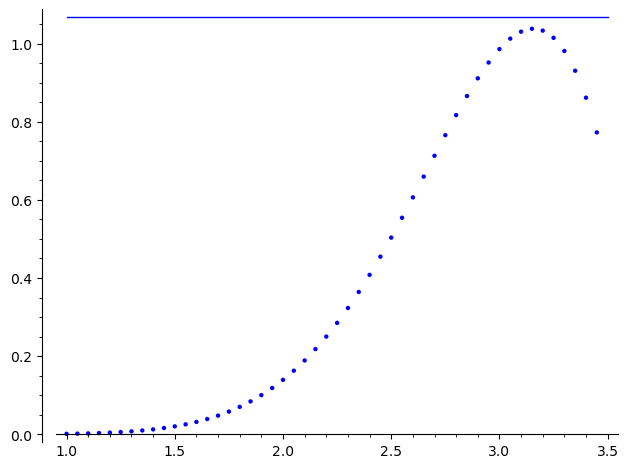

In [4]:
d = 7
e = 6
a = 20
point([(s/a,e*(v(d,s/a)-(e-2)*v(d,s/a-1))) for s in range(20,70)])+line([(1,16/15),(3.5,16/15)])

# It does not work in dimension 6.


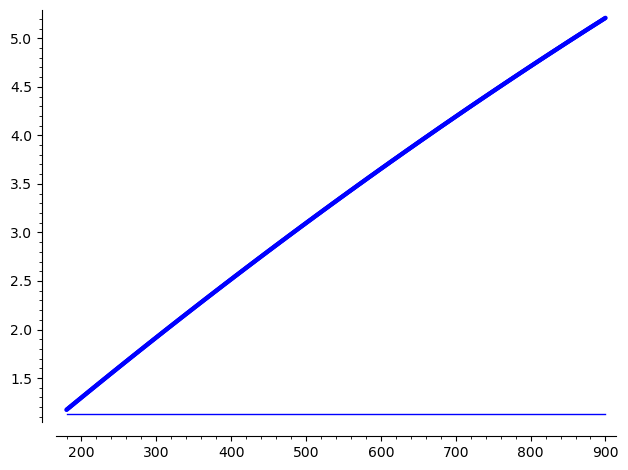

In [5]:
a = 10
e0 = 5
r0 = e0-2
rg = 4
s0 = 1.3 # If you put s0 = 1.3, then for 180≤e≤900, the volume estimate is over eHK(R_{2,6})
a = 180
b = 900
# points([(s/a,e0*(v(7,s/a)-r0*v(7,s/a-1))) for s in range(rg*a)])+line([(0,16/15),(rg,16/15)])+line([(s0,0),(s0,16/15)])
points([(e,-e^2*v(6,s0-1)+(v(6,s0)+2*v(6,s0-1))*e) for e in range(a,b+1)])+line([(a,1.125),(b,1.125)])

# Aberbach and Cox-Steib improved volume estimate (2023)

In [21]:
def H(d,e,s,t):
    '''
    0≤t≤1 and s≥0
    '''
    mu = e-2
    return 1-t/2+e*(v(d,s)-(mu-2)*v(d,s-1)-v(d,s-1/2)-v(d,s-t))
d = 7
a = 50 #This number is to add points
m = 3 #this number is to exaggerate the z axis
e = 6
t0 = 0
t1 = 1
s0 = 2
s1 = 3
var('x y z')
points([(i/a,j/a,m*max([1,H(d,e,i/a,j/a)])) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],size=1,color='yellow')+implicit_plot3d(z==m*71/67,(x,s0,s1),(y,t0,t1),(z,m*0.9,m*1.2),color='green',opacity=0.8)#+implicit_plot3d(z==m*16/15,(x,s0,s1),(y,t0,t1),(z,m*0.9,m*1.2),color='red',opacity=0.8)


Graphics3d Object

In [25]:
e0 = 4
inter = spline([(s/a,e0*(v(d,s/a)-(e0-1)*(s/a-1)^d/factorial(d))) for s in range(a*rg0,a*rg1)])

verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 136 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'


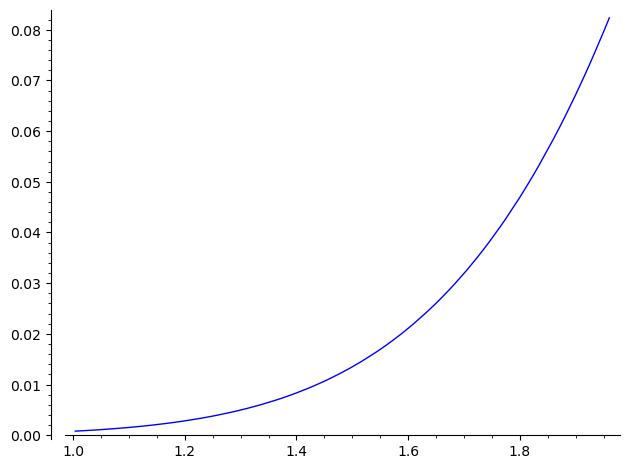

In [27]:
plot(inter,(0,3))